**Prediction for Diabetes in Adult Females of Pima Indian Heritage**


**Introduction:**

In the medical industry, the ability to efficiently and effectively detect and remedy diseases is crucial to improving a patient’s health. Quite notably, the early detection of diabetes, a chronic metabolic disorder affecting millions worldwide, can prevent serious complications. Luckily, with advancements in data science we can create models to help predict whether a person has diabetes or not by employing the methods of classification. 

Specifically, we hope to answer the following question: Can we employ the glucose and BMI(Body Mass Index) measurements available to us to predict whether an adult female of Pima Indian heritage has diabetes?

Using an existing data set from The National Institute of Diabetes and Digestive and Kidney Diseases, we will create a classification model to determine the answer to our question. All patients listed in this database are females over the age of 21 and of Pima Indian heritage. This dataset consists of several medical predictors (independent) variables and one target (dependent) variable, Outcome. They have modeled the outcome on two class variables 0 (does not have diabetes) and 1 (has diabetes).


**Preliminary exploratory data analysis:**

In [2]:
### run to install necessary libraries ###

library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [3]:
# read the data

diabetes <- read_csv("https://raw.githubusercontent.com/asnbl/dsci-100-2023-24W-group-16/main/diabetes.csv") 
head(diabetes)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


In [35]:
# tidy and wrangle data
diabetes_clean <- diabetes |>
    select(Glucose, Outcome, BMI) |>
    mutate(Outcome = as_factor(Outcome)) |>
    rename("Diabetes" = Outcome) |> 
    mutate(Diabetes = fct_recode(Diabetes, "yes" = "1", "no"  = "0"))

head(diabetes_clean)


# split data
set.seed(12)

diabetes_split <- initial_split(diabetes_clean, prop = 0.75, strata = Diabetes)
diabetes_train <- training(diabetes_split)
diabetes_test <- testing(diabetes_split) 

Glucose,Diabetes,BMI
<dbl>,<fct>,<dbl>
148,yes,33.6
85,no,26.6
183,yes,23.3
89,no,28.1
137,yes,43.1
116,no,25.6


In [41]:
# summary
diabetes_proportions <- diabetes_train |>
    group_by(Diabetes) |>
    summarize(count = n()) |>
    mutate(percent = 100*count/nrow(diabetes_train))

predictor_means <- diabetes_train |>
    select(-Diabetes) |>
    map_df(mean)

diabetes_proportions
predictor_means

Diabetes,count,percent
<fct>,<int>,<dbl>
no,375,65.10417
yes,201,34.89583


Glucose,BMI
<dbl>,<dbl>
120.5747,31.82726


Glucose,Diabetes,BMI
<dbl>,<fct>,<dbl>


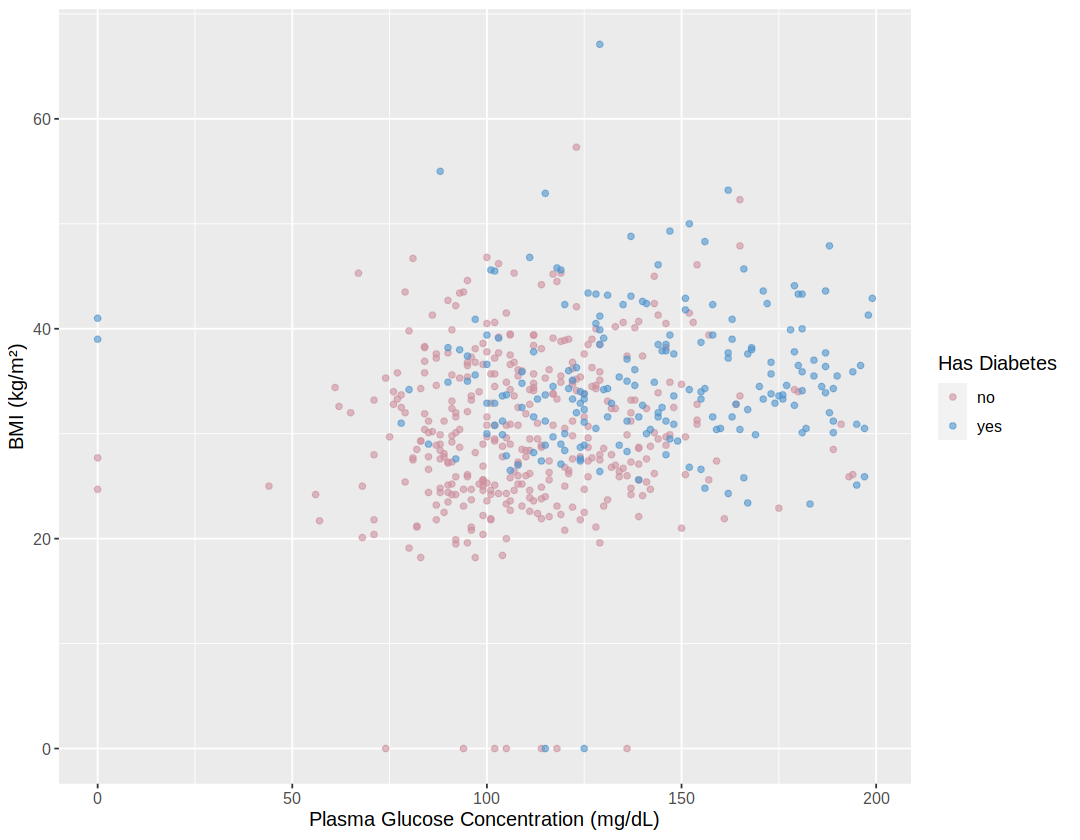

In [23]:
# visualization

options(repr.plot.width = 9, repr.plot.height = 7)

diabetes_plot <- diabetes_train |>
   ggplot(aes(x = Glucose, y = BMI, color = Diabetes)) +
   geom_point(alpha = 0.6) +
   labs(x = "Plasma Glucose Concentration (mg/dL)",
        y = "BMI (kg/m²)",
        color = "Has Diabetes") +
scale_color_manual(values = c("pink3","steelblue3")) +
theme(text = element_text(size = 12))
diabetes_plot

**Methods:**

1. First, the foundation for building a good classification prediction model is to load the correct libraries and read the data using the read_csv() function.

2. Next, we plan to clean and wrangle the data, as not all 9 of the columns in our data set are useful for our prediction. Using select() function, we will choose our predictors: Glucose and BMI, and also the class we are trying to identify, Diagnosis.  

3. We split the data into training and testing sets. Once the model is trained, it can be used to make predictions on new data using the predict() function.

4. Then we would combine pre-processing and model training using a workflow.

5. Then by tuning and using cross-validation, we will determine the optimal k-value to use for our classifier.

6. Finally, we can create a visualization of the cleaned data using a scatter plot.

**Expected outcomes and significance:**

From our model, we expect to find whether or not a woman of Pima Indian ancestry has diabetes. We will do that by taking a point on the plot and with the help of our predictors (glucose levels and BMI) make our prediction. We anticipate discovering whether these specific characteristics are positively or negatively associated with the occurrence of diabetes.

A model like this will not only contribute to the growing field of predictive medicine but also enhance the concept of preventive healthcare practices which can help improve the lives of millions who are susceptible to diabetes and timely intervention and adjustments to their lifestyle can aid in managing the condition and lowering the disease's risk.

After the model identifies individuals at high risk, we can then examine the efficiency of various intervention approaches, such as dietary and exercise programs, to determine which ones are the most effective in preventing diabetes.

**Data Sources:**

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
